# Capstone Project - The Battle of the Neighborhoods (Week 4 & Week 5)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)

## 1.   Introduction: Business Problem<a name="introduction"></a>

The business problem that we make is facing the biggest soccer league event in Europe, the UEFA Champions League Final 2020 scheduled to be played at the Atatürk Olympic Stadium in Istanbul, Turkey, how could we provide support to different visitors that coming from many countries to list and visualize Istanbul districts that fit their needs in term of culinary/ food venues. So specifically, this report will be targeted to stakeholders who want to visit the Atatürk Olympic Stadium in Istanbul, Turkey.

In this Capstone Project, the problem solving steps will be carried out on how to utilize Foursquare location data and use one of the machine learning techniques, namely clustering to make an analysis and decision to determine which neighborhoods are in accordance with the tastes of customers in the city of Istanbul when the big event was held.

## 2.  Data <a name="data"></a>

In this Capstone Project we need the data needed to be processed and analyzed, including
* List of districts of Istanbul 

  Source :  https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul 
  
  The list of districts of Istanbul data in the form of this table will be taken from Wikipedia through the scrapping   method then that table will be cleaned, explored, and processed then to add coordinates in each district in Istanbul can automatically use the geocoder class of Geopy client.
  
* Food Venue/Restaurants in each neighborhoods of Istanbul City

  Source  :  Foursquare APIs

  By using this Foursquare APIs after logging in using registered credentials, we will get all the closest places from all neighborhoods in Istanbul City so that we can get restaurants by filtering the data of the closest places from all the neighborhoods.



## 3.  Methodology <a name="methodology"></a>

In [1]:
# import library needed
import numpy as np       # library to handle data in a vectorized manner
import pandas as pd      # library for data analysis

!conda install -c conda-forge lxml --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - lxml


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    libxslt-1.1.33             |       h7d1a2b0_0         426 KB
    lxml-3.8.0                 |           py36_0         3.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.5 MB

The following NEW packages will be INSTALLED:

  libxslt            pkgs/main/linux-64::libxslt-1.1.33-h7d1a2b0_0
  lxml               conda-forge/linux-64::lxml-3.8.0-py36_0

The following packages will be UPDATED:

  ca-certificates                     2020.4.5.1-hecc5488_0 --> 

### 3.1  Use pandas to transform the data in the table on the Wikipedia page into a dataframe

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul')[0] #[0] means the first table on the website
df

,District,Population (2019),Area (km²),Density (per km²)
0,Adalar,15238,11.05,1379
1,Arnavutköy,282488,450.35,627
2,Ataşehir,425094,25.23,16849
3,Avcılar,448882,42.01,10685
4,Bağcılar,745125,22.36,33324
5,Bahçelievler,611059,16.62,36766
6,Bakırköy,229239,29.64,7734
7,Başakşehir,460259,104.30,4413
8,Bayrampaşa,274735,9.61,28588
9,Beşiktaş,182649,18.01,10142


### 3.2 Cleaning and Manipulation the Data

In [3]:
# rename column Population(2019) with Population
df.rename(columns={"Population (2019)": "Population"}, inplace=True)

# delete the rows with label 39,40,41,42 
df.drop([39, 40, 41, 42], axis=0, inplace=True)

df

,District,Population,Area (km²),Density (per km²)
0,Adalar,15238,11.05,1379
1,Arnavutköy,282488,450.35,627
2,Ataşehir,425094,25.23,16849
3,Avcılar,448882,42.01,10685
4,Bağcılar,745125,22.36,33324
5,Bahçelievler,611059,16.62,36766
6,Bakırköy,229239,29.64,7734
7,Başakşehir,460259,104.30,4413
8,Bayrampaşa,274735,9.61,28588
9,Beşiktaş,182649,18.01,10142


In [4]:
# detecting missing data
missing_data = df.isnull()
missing_data

,District,Population,Area (km²),Density (per km²)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [5]:
# count missing values in each column
for column in missing_data.columns.values.tolist():
    print (column)
    print (missing_data[column].value_counts())
    print ("")

District
False    39
Name: District, dtype: int64

Population
False    39
Name: Population, dtype: int64

Area (km²)
False    39
Name: Area (km²), dtype: int64

Density (per km²)
False    39
Name: Density (per km²), dtype: int64



In [6]:
# Use the .shape method to print the number of rows and number of columns of your dataframe
df.shape

(39, 4)

### 3.3  Add Geospatial Data

In [7]:
# install Geopy client to getting Coordinates of each District
!conda install -c conda-forge geopy --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.22.0-pyh9f0ad1d_0



geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: 

In [8]:
# module geocoder class from geopy client to convert an address each neighborhood into latitude and longitude values
from geopy.geocoders import Nominatim 

# In order to define an instance of the geocoder, we need to define a user_agent.
geolocator = Nominatim(user_agent="Istanbul_explorer")

df['Latitude']= df['District'].apply(geolocator.geocode).apply(lambda x: (x.latitude))
df['Longitude']= df['District'].apply(geolocator.geocode).apply(lambda x: (x.longitude))


In [9]:
df

,District,Population,Area (km²),Density (per km²),Latitude,Longitude
0,Adalar,15238,11.05,1379,40.876259,29.091027
1,Arnavutköy,282488,450.35,627,41.184182,28.740729
2,Ataşehir,425094,25.23,16849,40.984749,29.106720
3,Avcılar,448882,42.01,10685,40.980135,28.717547
4,Bağcılar,745125,22.36,33324,41.033899,28.857898
5,Bahçelievler,611059,16.62,36766,41.000290,28.863745
6,Bakırköy,229239,29.64,7734,40.983541,28.867974
7,Başakşehir,460259,104.30,4413,41.097693,28.806163
8,Bayrampaşa,274735,9.61,28588,41.035738,28.912260
9,Beşiktaş,182649,18.01,10142,41.042847,29.007528


### 3.4  Clustering Neighborhoods in Istanbul

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


#### Let's get the geographical coordinates of Istanbul

In [11]:
address = 'Istanbul'

geolocator = Nominatim(user_agent="Istanbul_explorer")  # In order to define an instance of the geocoder, we need to define a user_agent.
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Istanbul are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Istanbul are 41.0766019, 29.052495.


#### Let's visualize the neighborhoods in Istanbul with neighborhoods superimposed on top

In [12]:
# uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge folium=0.5.0 --yes 

# map rendering library
import folium 

# create map of Istanbul using latitude and longitude values
map_istanbul = folium.Map(location=[latitude, longitude], zoom_start=11)

 # add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_istanbul) 
    
map_istanbul

#### We are going to start utilizing the Foursquare API to explore the neighborhoods and segment them

In [13]:
# Define Foursquare Credentials and Version
CLIENT_ID = 'GYZ50WHF5PLIMET4ZEZOXTFQ1H3RSEUWAQSNKBCQO3PLRTYY' # your Foursquare ID
CLIENT_SECRET = '1UZEH2LNO25HZDPORVOYY0FBKWENKMYQZY431B5NS0YDIUQR' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30   # limit of number of venues returned by Foursquare API
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GYZ50WHF5PLIMET4ZEZOXTFQ1H3RSEUWAQSNKBCQO3PLRTYY
CLIENT_SECRET:1UZEH2LNO25HZDPORVOYY0FBKWENKMYQZY431B5NS0YDIUQR


In [14]:
# Get the first neighborhood's name.
df.loc[0, 'District']

'Adalar'

In [15]:
# Get the first neighborhood name, latitude, and longitude values.
neighborhood_latitude = df.loc[0, 'Latitude']    # first neighborhood latitude value
neighborhood_longitude = df.loc[0, 'Longitude']  # first neighborhood longitude value

neighborhood_name = df.loc[0, 'District'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Adalar are 40.87625945, 29.091027262109563.


#### Now, let's get the top 100 venues that are in Adalar within a radius of 500 meters

In [16]:
LIMIT = 30    # limit of number of venues returned by Foursquare API
radius = 500  # define radius

# create the GET request URL. Name your URL with url
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

# display URL
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=GYZ50WHF5PLIMET4ZEZOXTFQ1H3RSEUWAQSNKBCQO3PLRTYY&client_secret=1UZEH2LNO25HZDPORVOYY0FBKWENKMYQZY431B5NS0YDIUQR&v=20180604&ll=40.87625945,29.091027262109563&radius=500&limit=30'

In [17]:
# library to handle requests
import requests 

# Send the GET request and examine the resutls
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee33be65159bf15c3c3eb48'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Heybeliada',
  'headerFullLocation': 'Heybeliada, Istanbul',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 19,
  'suggestedBounds': {'ne': {'lat': 40.8807594545, 'lng': 29.096967555419248},
   'sw': {'lat': 40.8717594455, 'lng': 29.085086968799878}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c7f7c7dfb74236ae020fab9',
       'name': 'Merit Halki Palace Hotel',
       'location': {'address': 'Refah Şahitler Cad. No:94 Heybeliada',
        'lat': 40.87880172757172,
        'lng': 29.09097430805375,
        'labeledLatLngs': [{'label': 'display',
  

all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [18]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,categories,lat,lng
0,Merit Halki Palace Hotel,Hotel,40.878802,29.090974
1,İnönü Evi Müzesi,History Museum,40.878251,29.093647
2,L'isola Guesthouse,Bed & Breakfast,40.877038,29.096136
3,Huseyin Rahmi Gurpinar Muzesi,Museum,40.877224,29.092228
4,Aqua Green Beach,Beach,40.880498,29.090354


In [20]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

19 venues were returned by Foursquare.


In [21]:
print ('{} unique categories in Adalar'.format(nearby_venues['categories'].value_counts().shape[0]))

# the other way
print ('{} unique categories in Adalar'.format(len(nearby_venues['categories'].unique())))

15 unique categories in Adalar
15 unique categories in Adalar


In [22]:
print (nearby_venues['categories'].value_counts()[0:10])

Café               3
Mountain           2
Scenic Lookout     2
Harbor / Marina    1
Beach              1
Pool               1
Surf Spot          1
Museum             1
Tennis Court       1
History Museum     1
Name: categories, dtype: int64


#### Create a function to repeat the same process to all the neighborhoods in Istanbul to Explore Neighborhoods in Istanbul

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *istanbul_venues*.

In [24]:
istanbul_venues = getNearbyVenues(names=df['District'],
                                  latitudes=df['Latitude'],
                                  longitudes=df['Longitude']
                                  )

Adalar
Arnavutköy
Ataşehir
Avcılar
Bağcılar
Bahçelievler
Bakırköy
Başakşehir
Bayrampaşa
Beşiktaş
Beykoz
Beylikdüzü
Beyoğlu
Büyükçekmece
Çatalca
Çekmeköy
Esenler
Esenyurt
Eyüpsultan
Fatih
Gaziosmanpaşa
Güngören
Kadıköy
Kağıthane
Kartal
Küçükçekmece
Maltepe
Pendik
Sancaktepe
Sarıyer
Silivri
Sultanbeyli
Sultangazi
Şile
Şişli
Tuzla
Ümraniye
Üsküdar
Zeytinburnu


In [25]:
# Let's check the size of the resulting dataframe istanbul_venue
print(istanbul_venues.shape)
istanbul_venues.head()

(1024, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adalar,40.876259,29.091027,Merit Halki Palace Hotel,40.878802,29.090974,Hotel
1,Adalar,40.876259,29.091027,İnönü Evi Müzesi,40.878251,29.093647,History Museum
2,Adalar,40.876259,29.091027,L'isola Guesthouse,40.877038,29.096136,Bed & Breakfast
3,Adalar,40.876259,29.091027,Huseyin Rahmi Gurpinar Muzesi,40.877224,29.092228,Museum
4,Adalar,40.876259,29.091027,Aqua Green Beach,40.880498,29.090354,Beach


In [26]:
# Create a Data-Frame istanbul_venues_only_restaurant out of it to Concentrate Only on Restaurants 

istanbul_venues_only_restaurant = istanbul_venues[istanbul_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
istanbul_venues_only_restaurant.index = np.arange(1, len(istanbul_venues_only_restaurant )+1)

istanbul_venues_only_restaurant.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Arnavutköy,41.184182,28.740729,Noorden Cafe & Nargile & Restaurant,41.183990,28.737595,Restaurant
2,Arnavutköy,41.184182,28.740729,Hatay Katık Döner,41.182010,28.741291,Fast Food Restaurant
3,Arnavutköy,41.184182,28.740729,Big Mamma’s,41.186351,28.738677,Restaurant
4,Arnavutköy,41.184182,28.740729,Onur Kebap Ve Kofte Restaurant,41.185939,28.739412,Restaurant
5,Arnavutköy,41.184182,28.740729,Hamitağa Et Lokantası,41.182679,28.743357,Turkish Restaurant


In [27]:
# count number of each restaurant using value_counts()
istanbul_dist_venue_restaurant = istanbul_venues_only_restaurant['Venue Category'].value_counts()
istanbul_dist_venue_restaurant
#print (istanbul_venues_only_restaurant['Venue Category'].value_counts())

Turkish Restaurant                 60
Restaurant                         39
Seafood Restaurant                 15
Kebab Restaurant                   14
Fast Food Restaurant                9
Italian Restaurant                  6
Kokoreç Restaurant                  5
Comfort Food Restaurant             5
Doner Restaurant                    4
Turkish Home Cooking Restaurant     4
Middle Eastern Restaurant           4
Eastern European Restaurant         2
Thai Restaurant                     1
Mediterranean Restaurant            1
Chinese Restaurant                  1
Falafel Restaurant                  1
Kumpir Restaurant                   1
Theme Restaurant                    1
Name: Venue Category, dtype: int64

In [28]:
print('There are {} uniques venue categories that only restaurant in Istanbul.'.format(len(istanbul_venues_only_restaurant['Venue Category'].unique())))

There are 18 uniques venue categories that only restaurant in Istanbul.


In [29]:
# create a dataframe of top 10 categories
istanbul_venues_only_restaurant_top10 = istanbul_venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='Frequency')
# the other way
# istanbul_venues_only_restaurant_top10 = istanbul_venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame()
# istanbul_venues_only_restaurant_top10.rename(column={'Venue Category': 'Frequency'})

#istanbul_venues_only_restaurant_top10

#let's rename the index to 'Venue Only Restaurant'
istanbul_venues_only_restaurant_top10.index.name = 'Venue Only Restaurant'

# using reset index, a new index have been generated
istanbul_venues_only_restaurant_top10.reset_index(inplace=True)

istanbul_venues_only_restaurant_top10

,Venue Only Restaurant,Frequency
0,Turkish Restaurant,60
1,Restaurant,39
2,Seafood Restaurant,15
3,Kebab Restaurant,14
4,Fast Food Restaurant,9
5,Italian Restaurant,6
6,Kokoreç Restaurant,5
7,Comfort Food Restaurant,5
8,Doner Restaurant,4
9,Turkish Home Cooking Restaurant,4


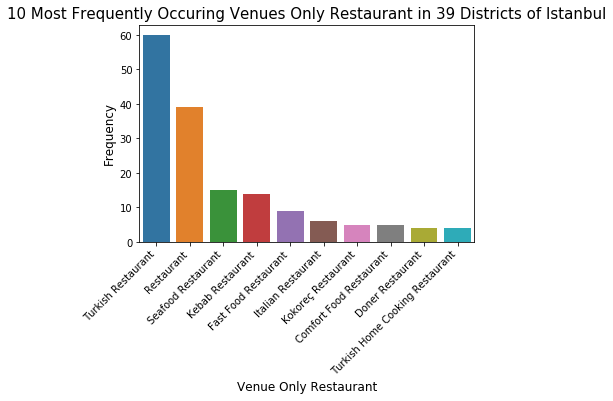

<Figure size 1296x504 with 0 Axes>

In [30]:
# Visualize istanbul venues only restaurant top 10 using barplot
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue Only Restaurant", y="Frequency", data=istanbul_venues_only_restaurant_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues Only Restaurant in 39 Districts of Istanbul', fontsize=15)
plt.xlabel("Venue Only Restaurant", fontsize=12)
plt.ylabel ("Frequency", fontsize=12)
#plt.savefig("Most_Freq_Venues_Restaurant.png", dpi=300)
fig = plt.figure(figsize=(18,7))

plt.show()

#### Let's check the size of the resulting dataframe istanbul_venues_only_restaurant

In [31]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", istanbul_venues_only_restaurant.shape)

istanbul_venues_only_restaurant.head(10)

Shape of the Data-Frame with Venue Category only Restaurant:  (173, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Arnavutköy,41.184182,28.740729,Noorden Cafe & Nargile & Restaurant,41.183990,28.737595,Restaurant
2,Arnavutköy,41.184182,28.740729,Hatay Katık Döner,41.182010,28.741291,Fast Food Restaurant
3,Arnavutköy,41.184182,28.740729,Big Mamma’s,41.186351,28.738677,Restaurant
4,Arnavutköy,41.184182,28.740729,Onur Kebap Ve Kofte Restaurant,41.185939,28.739412,Restaurant
5,Arnavutköy,41.184182,28.740729,Hamitağa Et Lokantası,41.182679,28.743357,Turkish Restaurant
6,Arnavutköy,41.184182,28.740729,Dürümcü Musa Usta,41.184404,28.743388,Turkish Restaurant
7,Ataşehir,40.984749,29.106720,By Adalı,40.984396,29.107588,Restaurant
8,Ataşehir,40.984749,29.106720,Döner Ağacı,40.984789,29.107400,Doner Restaurant
9,Ataşehir,40.984749,29.106720,Fauna,40.984714,29.109882,Italian Restaurant
10,Ataşehir,40.984749,29.106720,Tatar Salim Döner Lokantası,40.986168,29.109667,Doner Restaurant


#### Analyze Each Neighborhood in Istanbul

In [32]:
# count number of restaurant in each neighborhood
istanbul_venues_restaurant = istanbul_venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
istanbul_venues_restaurant

#theotherway
#istanbul_venues_only_restaurant['Neighborhood'].value_counts()

Neighborhood
Arnavutköy        6
Ataşehir          8
Avcılar           1
Bahçelievler      4
Bakırköy          1
Bayrampaşa        5
Bağcılar          1
Başakşehir        5
Beykoz            1
Beylikdüzü        8
Beyoğlu           4
Beşiktaş          3
Büyükçekmece      9
Esenler           2
Esenyurt          5
Eyüpsultan        5
Fatih             2
Gaziosmanpaşa     9
Güngören         15
Kadıköy           4
Kartal            1
Kağıthane         3
Küçükçekmece      9
Maltepe           7
Sancaktepe        2
Sarıyer           3
Silivri          10
Sultanbeyli       8
Tuzla             1
Zeytinburnu       8
Çatalca           4
Çekmeköy          5
Ümraniye          2
Üsküdar           4
Şişli             8
Name: Venue Category, dtype: int64

In [33]:
# create dataframe from value_counts above
istanbul_venues_restaurant_df  = istanbul_venues_restaurant.to_frame().reset_index()

# rename first column with 'Neighborhood' and second column with 'Number of Restaurant' 
istanbul_venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']

# arrange index from number 1
istanbul_venues_restaurant_df.index = np.arange(1, len(istanbul_venues_restaurant_df)+1)

#list_restaurant_no = istanbul_venues_restaurant_df['Number of Restaurant'].to_list()
#list_district =istanbul_venues_restaurant_df['Neighborhood'].to_list()
#print (list_restaurant_no)
#print (list_district)

#istanbul_venues_restaurant_df  = istanbul_venues_restaurant.to_frame()
istanbul_venues_restaurant_df

,Neighborhood,Number of Restaurant
1,Arnavutköy,6
2,Ataşehir,8
3,Avcılar,1
4,Bahçelievler,4
5,Bakırköy,1
6,Bayrampaşa,5
7,Bağcılar,1
8,Başakşehir,5
9,Beykoz,1
10,Beylikdüzü,8


In [34]:
# dataframe istanbul_venues_only_restaurant contains column Neighborhood, Neighborhood Latitude, Neighborhood Longitude, Venue, Venue Latitude, Venue Longitude, Venue Category
# one hot encoding
istanbul_onehot = pd.get_dummies(istanbul_venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
istanbul_onehot['Neighborhood'] = istanbul_venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [istanbul_onehot.columns[-1]] + list(istanbul_onehot.columns[:-1])
istanbul_onehot = istanbul_onehot[fixed_columns]

istanbul_onehot.head()

,Neighborhood,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant,Kebab Restaurant,Kokoreç Restaurant,Kumpir Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Restaurant,Seafood Restaurant,Thai Restaurant,Theme Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant
1,Arnavutköy,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Arnavutköy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Arnavutköy,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Arnavutköy,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,Arnavutköy,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
# And let's examine the new dataframe size.
istanbul_onehot.shape

(173, 19)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [36]:
# reset_index() use for reset index each row after grouping
istanbul_grouped = istanbul_onehot.groupby('Neighborhood').mean().reset_index()
istanbul_grouped

,Neighborhood,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant,Kebab Restaurant,Kokoreç Restaurant,Kumpir Restaurant,Mediterranean Restaurant,Middle Eastern Restaurant,Restaurant,Seafood Restaurant,Thai Restaurant,Theme Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant
0,Arnavutköy,0.000,0.00,0.00,0.0,0.000000,0.166667,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.500000,0.000000,0.00,0.000,0.000000,0.333333
1,Ataşehir,0.000,0.00,0.25,0.0,0.000000,0.000000,0.250000,0.125000,0.000000,0.0,0.0,0.000000,0.375000,0.000000,0.00,0.000,0.000000,0.000000
2,Avcılar,0.000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000
3,Bahçelievler,0.000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.250000,0.0,0.0,0.000000,0.250000,0.250000,0.00,0.000,0.000000,0.250000
4,Bakırköy,0.000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.000,0.000000,1.000000
5,Bayrampaşa,0.000,0.20,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,0.0,0.0,0.000000,0.000000,0.200000,0.00,0.000,0.000000,0.400000
6,Bağcılar,0.000,0.00,0.00,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000
7,Başakşehir,0.000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.2,0.200000,0.400000,0.000000,0.00,0.000,0.000000,0.200000
8,Beykoz,0.000,1.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00,0.000,0.000000,0.000000
9,Beylikdüzü,0.000,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.250000,0.000000,0.0,0.0,0.000000,0.250000,0.000000,0.00,0.000,0.000000,0.500000


In [37]:
# And let's examine the new dataframe size.
istanbul_grouped.shape

(35, 19)

#### Let's print each neighborhood along with the top 5 most common venues that only restaurant in Istanbul

In [38]:
num_top_venues = 5

for hood in istanbul_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = istanbul_grouped[istanbul_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq of occurrence']
    temp = temp.iloc[1:]
    temp['freq of occurrence'] = temp['freq of occurrence'].astype(float)
    temp = temp.round({'freq': 3})
    print(temp.sort_values('freq of occurrence', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arnavutköy----
                             venue  freq of occurrence
0                       Restaurant            0.500000
1               Turkish Restaurant            0.333333
2             Fast Food Restaurant            0.166667
3         Mediterranean Restaurant            0.000000
4  Turkish Home Cooking Restaurant            0.000000


----Ataşehir----
                venue  freq of occurrence
0          Restaurant               0.375
1    Doner Restaurant               0.250
2  Italian Restaurant               0.250
3    Kebab Restaurant               0.125
4  Chinese Restaurant               0.000


----Avcılar----
                             venue  freq of occurrence
0               Kokoreç Restaurant                 1.0
1               Chinese Restaurant                 0.0
2         Mediterranean Restaurant                 0.0
3  Turkish Home Cooking Restaurant                 0.0
4                 Theme Restaurant                 0.0


----Bahçelievler----
         

#### Let's put that into a pandas dataframe

In [39]:
#First, let's write a function to sort the venues that only restaurant in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Now let's create the new dataframe and display the top 10 venues  that only restaurant for each neighborhood

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = istanbul_grouped['Neighborhood']

for ind in np.arange(istanbul_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(istanbul_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arnavutköy,Restaurant,Turkish Restaurant,Fast Food Restaurant,Kebab Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Italian Restaurant,Kokoreç Restaurant
1,Ataşehir,Restaurant,Doner Restaurant,Italian Restaurant,Kebab Restaurant,Turkish Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Kokoreç Restaurant
2,Avcılar,Kokoreç Restaurant,Turkish Home Cooking Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant,Kebab Restaurant,Turkish Restaurant
3,Bahçelievler,Turkish Restaurant,Seafood Restaurant,Restaurant,Kokoreç Restaurant,Thai Restaurant,Theme Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kumpir Restaurant,Turkish Home Cooking Restaurant
4,Bakırköy,Turkish Restaurant,Turkish Home Cooking Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant,Kebab Restaurant,Kokoreç Restaurant
5,Bayrampaşa,Turkish Restaurant,Seafood Restaurant,Comfort Food Restaurant,Kokoreç Restaurant,Thai Restaurant,Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kumpir Restaurant,Turkish Home Cooking Restaurant
6,Bağcılar,Fast Food Restaurant,Turkish Restaurant,Turkish Home Cooking Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Italian Restaurant,Kebab Restaurant,Kokoreç Restaurant
7,Başakşehir,Restaurant,Turkish Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Italian Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant
8,Beykoz,Comfort Food Restaurant,Turkish Restaurant,Turkish Home Cooking Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant,Kebab Restaurant,Kokoreç Restaurant
9,Beylikdüzü,Turkish Restaurant,Kebab Restaurant,Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant,Kokoreç Restaurant


#### Cluster Neighborhoods

In [41]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [42]:
# Run k-means to cluster the neighborhood into 5 clusters
# set number of clusters
kclusters = 5

istanbul_grouped_clustering = istanbul_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(istanbul_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 4, 1, 0, 0, 3, 1, 3, 0], dtype=int32)

Let's create a new dataframe that includes the cluster label as well as the top 10 venues for each neighborhood.

In [43]:
# add clustering labels to first column of dataframe neighborhoods_venues_sorted
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

istanbul_merged = df

istanbul_merged.rename(columns={'District':'Neighborhood'}, inplace=True)

# merge neighborhoods_venues_sorted with df to add latitude/longitude for each neighborhood
# istanbul_merged = istanbul_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# with merge function, istanbul_merged and neighborhoods_venues_sorted in this case `Neighborhood` is the only column name in  both dataframes
merged_inner = pd.merge(left=istanbul_merged, right=neighborhoods_venues_sorted, left_on='Neighborhood', right_on='Neighborhood')

merged_inner.head() # check the last columns!

,Neighborhood,Population,Area (km²),Density (per km²),Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arnavutköy,282488,450.35,627,41.184182,28.740729,1,Restaurant,Turkish Restaurant,Fast Food Restaurant,Kebab Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Italian Restaurant,Kokoreç Restaurant
1,Ataşehir,425094,25.23,16849,40.984749,29.106720,2,Restaurant,Doner Restaurant,Italian Restaurant,Kebab Restaurant,Turkish Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Kokoreç Restaurant
2,Avcılar,448882,42.01,10685,40.980135,28.717547,4,Kokoreç Restaurant,Turkish Home Cooking Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant,Kebab Restaurant,Turkish Restaurant
3,Bağcılar,745125,22.36,33324,41.033899,28.857898,3,Fast Food Restaurant,Turkish Restaurant,Turkish Home Cooking Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Italian Restaurant,Kebab Restaurant,Kokoreç Restaurant
4,Bahçelievler,611059,16.62,36766,41.000290,28.863745,1,Turkish Restaurant,Seafood Restaurant,Restaurant,Kokoreç Restaurant,Thai Restaurant,Theme Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kumpir Restaurant,Turkish Home Cooking Restaurant


Finally, let's visualize the resulting clusters

In [44]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [45]:
# create map
map_restaurants = folium.Map(location=[latitude,longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
#rainbow = ['#00ff00', '#ff00ff','#0000ff','#ffa500' ,'#ff0000']
#Districts = ['Nagatacho', 'Nihonbashi', 'Shinjuku', 'Shinagawa', 'Shibuya']

# add markers to the map
for lat, lon, poi, cluster in zip(merged_inner['Latitude'], 
                                  merged_inner['Longitude'], 
                                  merged_inner['Neighborhood'], 
                                  merged_inner['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants)
       
map_restaurants

### 3.5  Examine the Clusters

Now, you can examine each cluster and determine the discriminating venue restarurant that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [46]:
# choose dataframe merged_inner that have column Cluster Labels = 0, column 1, and from column 8 to last column
merged_inner.loc[merged_inner['Cluster Labels'] == 0, merged_inner.columns[[0] + list(range(7, merged_inner.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Bakırköy,Turkish Restaurant,Turkish Home Cooking Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant,Kebab Restaurant,Kokoreç Restaurant
7,Bayrampaşa,Turkish Restaurant,Seafood Restaurant,Comfort Food Restaurant,Kokoreç Restaurant,Thai Restaurant,Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kumpir Restaurant,Turkish Home Cooking Restaurant
10,Beylikdüzü,Turkish Restaurant,Kebab Restaurant,Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant,Kokoreç Restaurant
14,Çekmeköy,Turkish Restaurant,Restaurant,Kumpir Restaurant,Kebab Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant
17,Eyüpsultan,Turkish Restaurant,Middle Eastern Restaurant,Kebab Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant,Kokoreç Restaurant
18,Fatih,Turkish Restaurant,Kebab Restaurant,Turkish Home Cooking Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant,Kokoreç Restaurant
20,Güngören,Kebab Restaurant,Turkish Restaurant,Seafood Restaurant,Restaurant,Middle Eastern Restaurant,Turkish Home Cooking Restaurant,Fast Food Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant
24,Küçükçekmece,Turkish Restaurant,Seafood Restaurant,Restaurant,Kokoreç Restaurant,Thai Restaurant,Theme Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kumpir Restaurant,Turkish Home Cooking Restaurant
25,Maltepe,Turkish Restaurant,Seafood Restaurant,Restaurant,Fast Food Restaurant,Kebab Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Italian Restaurant
27,Sarıyer,Turkish Restaurant,Kebab Restaurant,Seafood Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant,Kokoreç Restaurant


#### Cluster 2

In [47]:
# choose dataframe merged_inner that have column Cluster Labels = 1, column 1, and from column 8 to last column
merged_inner.loc[merged_inner['Cluster Labels'] == 1, merged_inner.columns[[0] + list(range(7, merged_inner.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arnavutköy,Restaurant,Turkish Restaurant,Fast Food Restaurant,Kebab Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Italian Restaurant,Kokoreç Restaurant
4,Bahçelievler,Turkish Restaurant,Seafood Restaurant,Restaurant,Kokoreç Restaurant,Thai Restaurant,Theme Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kumpir Restaurant,Turkish Home Cooking Restaurant
6,Başakşehir,Restaurant,Turkish Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Italian Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant
8,Beşiktaş,Seafood Restaurant,Restaurant,Falafel Restaurant,Turkish Restaurant,Kebab Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Fast Food Restaurant,Italian Restaurant
12,Büyükçekmece,Turkish Restaurant,Restaurant,Italian Restaurant,Fast Food Restaurant,Kokoreç Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Mediterranean Restaurant,Kumpir Restaurant,Turkish Home Cooking Restaurant
13,Çatalca,Restaurant,Turkish Restaurant,Kebab Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant,Kokoreç Restaurant
15,Esenler,Turkish Restaurant,Restaurant,Kebab Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant,Kokoreç Restaurant
16,Esenyurt,Turkish Restaurant,Kebab Restaurant,Eastern European Restaurant,Restaurant,Fast Food Restaurant,Comfort Food Restaurant,Doner Restaurant,Falafel Restaurant,Italian Restaurant,Kokoreç Restaurant
19,Gaziosmanpaşa,Turkish Restaurant,Restaurant,Fast Food Restaurant,Kebab Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Italian Restaurant,Kokoreç Restaurant
22,Kağıthane,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Kebab Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant


#### Cluster 3

In [48]:
# choose dataframe merged_inner that have column Cluster Labels = 2, column 1, and from column 8 to last column
merged_inner.loc[merged_inner['Cluster Labels'] == 2, merged_inner.columns[[0] + list(range(7, merged_inner.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Ataşehir,Restaurant,Doner Restaurant,Italian Restaurant,Kebab Restaurant,Turkish Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Kokoreç Restaurant
11,Beyoğlu,Kebab Restaurant,Thai Restaurant,Doner Restaurant,Italian Restaurant,Turkish Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Kokoreç Restaurant
31,Tuzla,Eastern European Restaurant,Turkish Restaurant,Turkish Home Cooking Restaurant,Comfort Food Restaurant,Doner Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant,Kebab Restaurant,Kokoreç Restaurant


#### Cluster 4

In [49]:
# choose dataframe merged_inner that have column Cluster Labels = 3, column 1, and from column 8 to last column
merged_inner.loc[merged_inner['Cluster Labels'] == 3, merged_inner.columns[[0] + list(range(7, merged_inner.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Bağcılar,Fast Food Restaurant,Turkish Restaurant,Turkish Home Cooking Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Italian Restaurant,Kebab Restaurant,Kokoreç Restaurant
9,Beykoz,Comfort Food Restaurant,Turkish Restaurant,Turkish Home Cooking Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant,Kebab Restaurant,Kokoreç Restaurant
21,Kadıköy,Comfort Food Restaurant,Seafood Restaurant,Restaurant,Fast Food Restaurant,Turkish Restaurant,Kebab Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Italian Restaurant
26,Sancaktepe,Comfort Food Restaurant,Fast Food Restaurant,Turkish Restaurant,Turkish Home Cooking Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Italian Restaurant,Kebab Restaurant,Kokoreç Restaurant


#### Cluster 5

In [50]:
# choose dataframe merged_inner that have column Cluster Labels = 4, column 1, and from column 8 to last column
merged_inner.loc[merged_inner['Cluster Labels'] == 4, merged_inner.columns[[0] + list(range(7, merged_inner.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Avcılar,Kokoreç Restaurant,Turkish Home Cooking Restaurant,Comfort Food Restaurant,Doner Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,Italian Restaurant,Kebab Restaurant,Turkish Restaurant
